In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Task 1: Exploratory Data Analysis (EDA): 

In [2]:
# load the data set 
data = pd.read_csv('/DataScienceNotes/Assignments/14-PCA/wine.csv')

In [3]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
# stastical summary
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# checking null values
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
# checking the zeros as null 
(data == 0).sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

#### data set is not having any missing values

<Figure size 1200x1000 with 0 Axes>

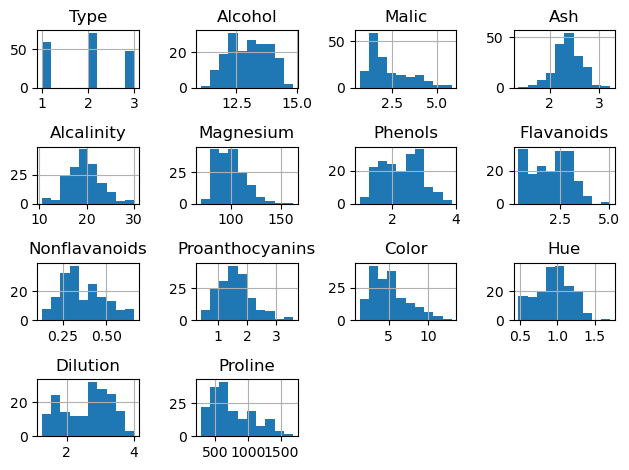

In [8]:
# finding the features correlations
plt.figure(figsize=(12, 10))
data.hist()
plt.title("Feature Distribution")
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

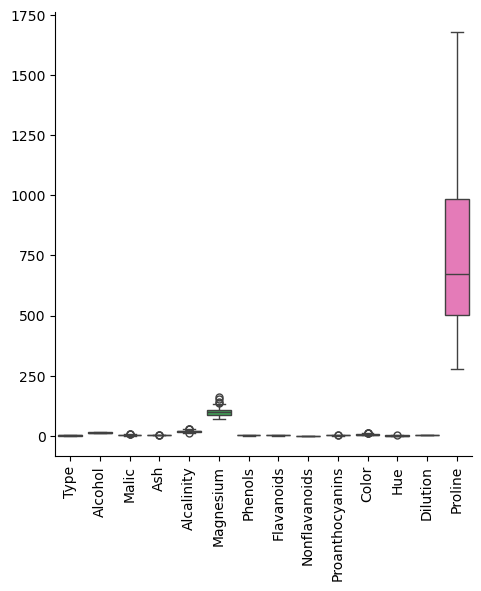

In [9]:
# finding outliers
plt.figure(figsize=(15, 6))
sns.catplot(data, kind='box')
plt.xticks(rotation=90)
plt.show()

##### Features have different scale, scaling required for PCA and K-Means

Didn't find the outliers

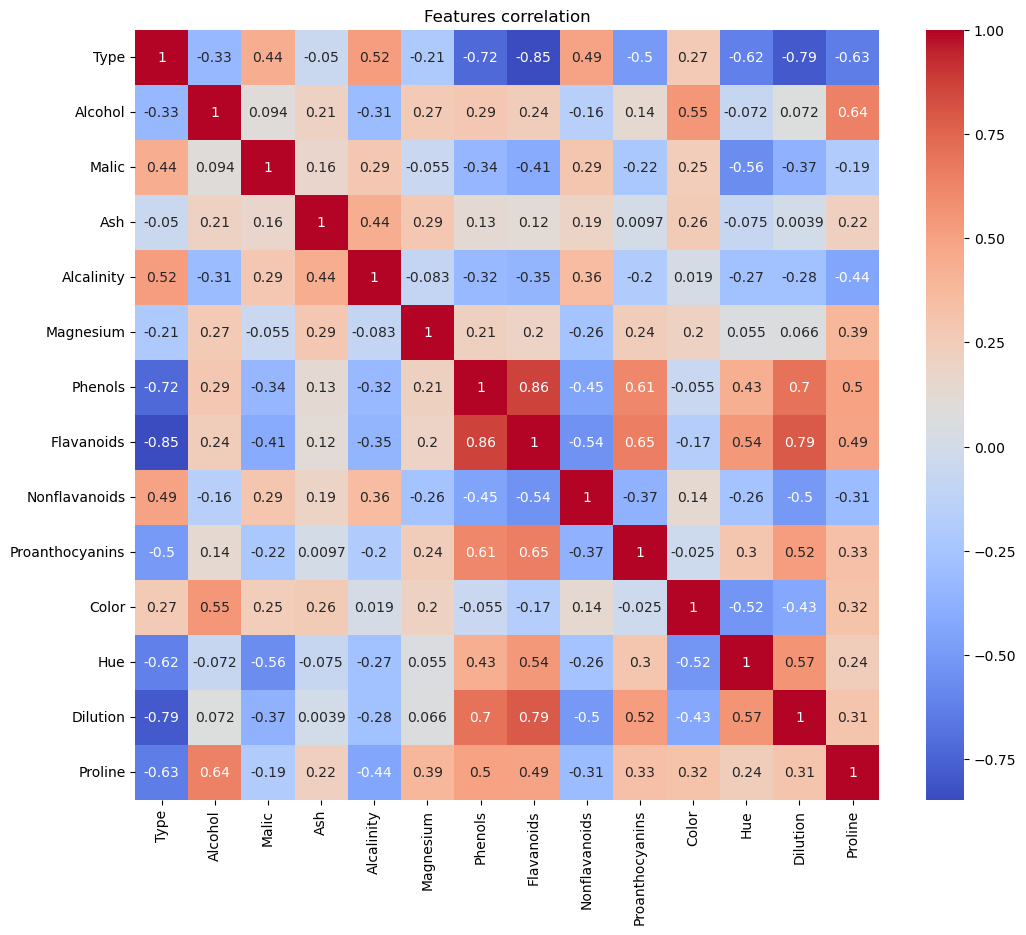

In [10]:
plt.figure(figsize= (12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True )
plt.title("Features correlation")
plt.show()

strong correlation between the features.

PCA is useful to remove redundancy

### Task 2: Dimensionality Reduction with PCA: 

In [11]:
# scaling the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data)

# bringing features on same scale because PCA is variance based

In [12]:
# Applying pca
from sklearn.decomposition  import PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

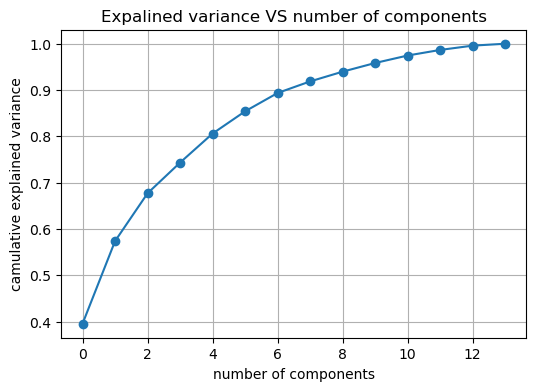

In [13]:
# scree plot 
# determining optimal number of components 
plt.figure(figsize = (6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('number of components')
plt.ylabel('camulative explained variance')
plt.title('Expalined variance VS number of components')
plt.grid()
plt.show()

choosing components explaining >=90-95% variance

In [14]:
# making other set of pca using 2 components 
pca_2 = PCA(n_components=2)
pca_data_2 = pca_2.fit_transform(scaled_data)

### Task 3: Clustering with Original Data: 

In [15]:
# Applying K-Means on original data
from sklearn.cluster import KMeans
kmeans_og = KMeans(n_clusters=3, random_state=42)
label_og = kmeans_og.fit_predict(scaled_data)

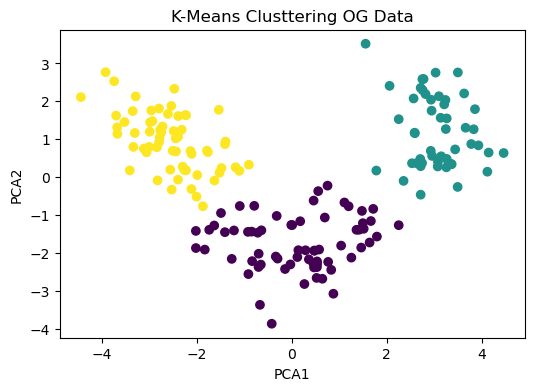

In [16]:
# visualizing the data
plt.figure(figsize=(6,4))
plt.scatter(pca_data_2[:, 0], pca_data_2[:, 1], c=label_og, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clusttering OG Data')
plt.show()

In [17]:
# evaluating the clusttering
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_og = silhouette_score(scaled_data, label_og)
db_og = davies_bouldin_score(scaled_data, label_og)
silhouette_og, db_og

(0.30648398324833453, 1.315707552261773)

### Task 4: Clustering with PCA Data: 

In [18]:
# applying kmeans on pca data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
label_pca = kmeans_pca.fit_predict(pca_data_2)

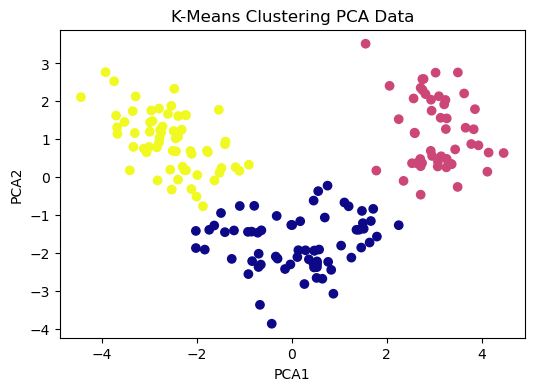

In [19]:
# visualizing the data 
plt.figure(figsize=(6,4))
plt.scatter(pca_data_2[:, 0], pca_data_2[:, 1], c=label_pca, cmap='plasma')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering PCA Data')
plt.show()

In [20]:
# evaluating the cluster
silhouette_pca = silhouette_score(pca_data_2, label_pca)
db_pca = davies_bouldin_score(pca_data_2, label_pca)

silhouette_pca, db_pca


(0.6024415520362844, 0.5397078562575713)

### Task 5: Comparison and Analysis:

Silhouete score is higher or lower for the original data but often higher with PCA data

Davies Bouldin  is higher for original data and lower for the PCA data

PCA clusters are more compact.

Noise and redundancy reduced.

Slight information loss but better structure

### Task 6: Conclusion and Insights 

Features are highly correlated.

PCA improves clustering quality and interpretabilty.

K-Means performs better on reduced dimensions.

Standardize is required before PCA and Kmeans

As it's having high dimensional dataset used PCA and cluster.